# Health Insurance Premium Prediction with Machine Learning Using Python

Objective: To develop a predictive model to estimate health insurance premiums based on individual characteristics.

Background: Health insurance premiums are influenced by various factors, including age, gender, body mass index (BMI), number of children, smoking habits, and geographic region. By analyzing these variables, we aim to predict the insurance charges for individuals.

Data Description: The dataset comprises the following features:

Age: Age of the individual.

Sex: Gender of the individual (male/female).

BMI: Body Mass Index, a measure of body fat based on height and weight.

Children: Number of children covered by the insurance.

Smoker: Smoking status of the individual (yes/no).

Region: Geographic region of residence (e.g., southwest, southeast, northwest, northeast).

Charges: Annual insurance premium charged to the individual.

## 1 - Libraries: 

In [1]:
# Importing necessary libraries:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score

## 2 - Data Collection: 

In [2]:
# Load the dataset

df = pd.read_csv(r'C:\Users\DELL\Desktop\Machine Learning - Datasets\Health_Insurance_Premium_Prediction.zip')

In [3]:
# Show the first few rows of the dataset

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## 3 - Exploratory Data Analysis (EDA) 

In [4]:
# Check the dataset info for data types and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
df.shape

(1338, 7)

In [7]:
# Checking for duplicates

df.duplicated().sum()

1

In [8]:
# Display the duplicate row
duplicate_row = df[df.duplicated()]

print(duplicate_row)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59         0     no  northwest  1639.5631


In [9]:
# Remove the duplicate row

df = df.drop_duplicates()

# Verifying that the duplicate has been removed.
print("Number of duplicates after removal:", df.duplicated().sum())

Number of duplicates after removal: 0


In [10]:
# Check the shape of the dataset to confirm

print(df.shape)

(1337, 7)


## 4 - Data Preprocessing 

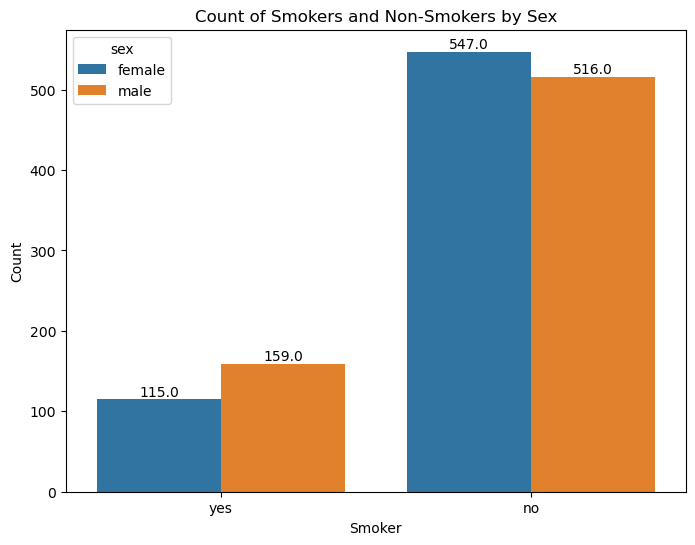

In [11]:


# Count plot for smokers vs non-smokers by sex
plt.figure(figsize=(8,6))
ax = sns.countplot(x='smoker', hue='sex', data=df)

# Add count labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom')

plt.title('Count of Smokers and Non-Smokers by Sex')
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.show()


The chart shows the distribution of smokers and non-smokers, categorized by sex:

There are more non-smokers than smokers in the dataset. Among non-smokers, females (547) slightly outnumber males (516).

Among smokers, males (159) are more frequent than females (115).


Converting 'sex' and 'smoker' columns from String to Numeric Values Suitable for machine learning model

In [12]:
# Convert 'sex' column: male -> 1, female -> 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})

# Convert 'smoker' column: yes -> 1, no -> 0
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Verify the conversion
print(df.head())


   age  sex     bmi  children  smoker     region      charges
0   19    0  27.900         0       1  southwest  16884.92400
1   18    1  33.770         1       0  southeast   1725.55230
2   28    1  33.000         3       0  southeast   4449.46200
3   33    1  22.705         0       0  northwest  21984.47061
4   32    1  28.880         0       0  northwest   3866.85520


In [13]:
# Checking that there's no string values in our required column features.

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   int64  
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   int64  
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 83.6+ KB


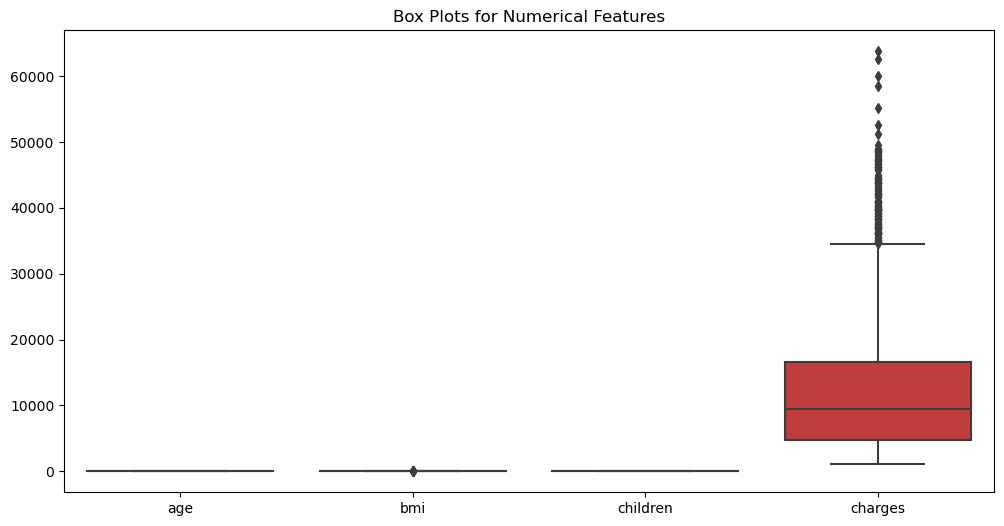

In [14]:

# Set the figure size
plt.figure(figsize=(12, 6))

# Create box plots for numerical features
sns.boxplot(data=df[['age', 'bmi', 'children', 'charges']])
plt.title('Box Plots for Numerical Features')
plt.show()


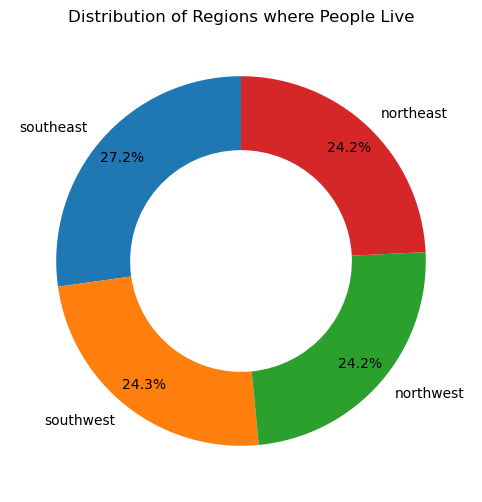

In [15]:

# Get the count of each region
region_counts = df['region'].value_counts()

# Create a donut chart
plt.figure(figsize=(8, 6))
plt.pie(region_counts, labels=region_counts.index, 
        autopct='%1.1f%%', startangle=90, 
        pctdistance=0.85, wedgeprops={'width': 0.4})

# Add a title
plt.title('Distribution of Regions where People Live')
plt.show()


C:\Users\DELL\AppData\Local\Temp\ipykernel_12036\681910269.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='viridis')


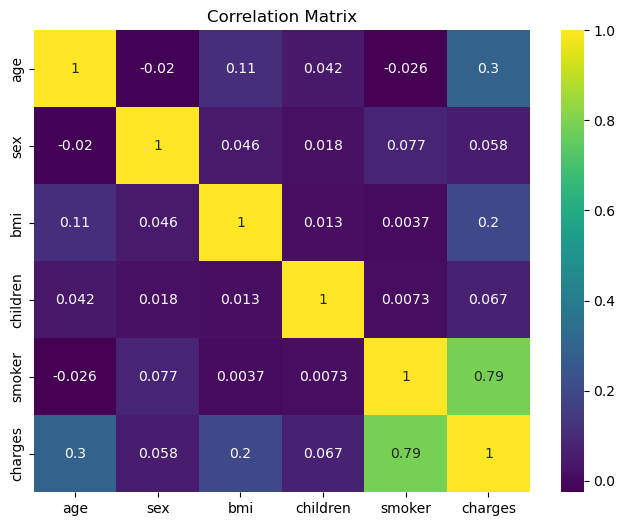

In [16]:
# Create a heatmap to visualize the correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()

The heatmap shows a strong positive correlation between the smoker and insurance charge (0.79) indicating that being a smoker significantly increases insurance charges.

Age also has a moderate positive correlation with insurance charge (0.30), suggesting that older individuals tend to have higher charges.

###  Distribution of Numerical Features in Health Insurance Premium Dataset

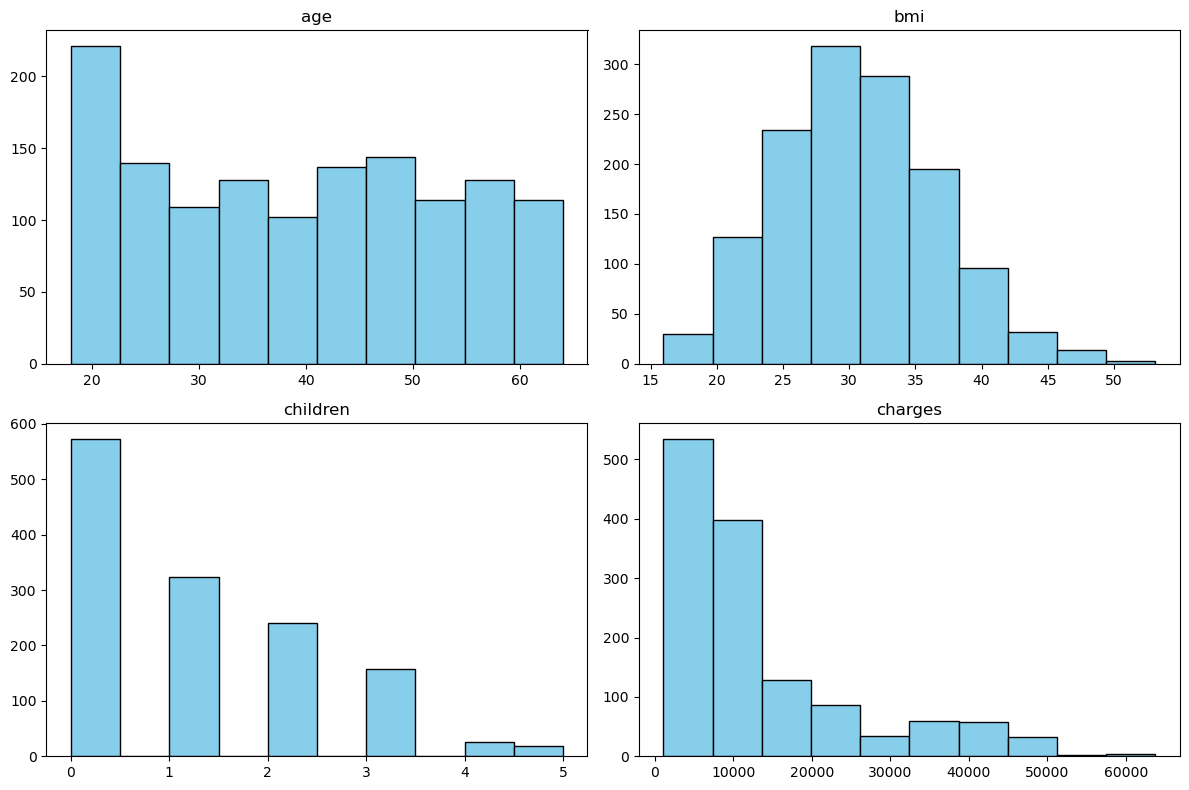

In [17]:
# Plot histograms for numerical columns
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
df[['age', 'bmi', 'children', 'charges']].hist(ax=axes, bins=10, color='skyblue', edgecolor='black')

# Iterate over each subplot and remove gridlines
for ax in axes.flatten():
    ax.grid(False)

plt.tight_layout()
plt.show()

The charges column, which is the target variable, shows a right-skewed distribution.

Most insurance premiums fall under 20,000, with a few higher premiums exceeding 40,000.

This right skew indicates that while the majority of charges are on the lower end, a few individuals incur significantly higher insurance costs.

###  Using the logarithmic transformation to Reduce the right-skewness in 'charges'

In [18]:
# Applying a logarithmic transformation to compress the range of values, making the distribution 
# more normal for linear regression model. 

df['log_charges'] = np.log(df['charges'])

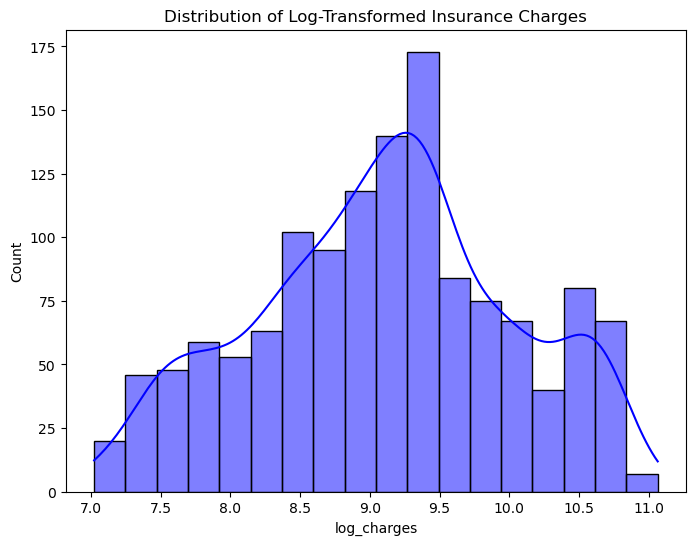

In [19]:
# Distribution of log-transformed charges

plt.figure(figsize=(8,6))
sns.histplot(df['log_charges'], kde=True, color='blue')
plt.title('Distribution of Log-Transformed Insurance Charges')
plt.show()

In [20]:
df.head()

,age,sex,bmi,children,smoker,region,charges,log_charges
0,19,0,27.900,0,1,southwest,16884.92400,9.734176
1,18,1,33.770,1,0,southeast,1725.55230,7.453302
2,28,1,33.000,3,0,southeast,4449.46200,8.400538
3,33,1,22.705,0,0,northwest,21984.47061,9.998092
4,32,1,28.880,0,0,northwest,3866.85520,8.260197


##  5 - Features Selection

In [21]:
X = df.drop(['charges', 'log_charges', 'region'], axis=1)
y = df['log_charges']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting sets
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1069, 5) (268, 5) (1069,) (268,)


## 6 - Model Training 

We will train three regression models: Linear Regression, Decision Tree Regressor, and Random Forest Regressor.

In [22]:
# Linear Regression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred_log = lr_model.predict(X_test)


In [23]:
# Decision Tree Regressor

dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
dt_pred_log = dt_model.predict(X_test)


In [24]:
# Random Forest Regressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred_log = rf_model.predict(X_test)


###  Reverse the Log Transformation (Exponentiate Predictions)

After making the predictions, we reverse the log transformation to get back to the original scale of 'charges' by applying the exponential function (np.exp).

In [25]:
# Reverse the log transformation for predictions to the original scale of 'charges'

lr_pred = np.exp(lr_pred_log)
dt_pred = np.exp(dt_pred_log)
rf_pred = np.exp(rf_pred_log)

# Reverse the log transformation for actual values
y_test_original = np.exp(y_test)

## 7 - Model Evaluation 

In [26]:
# Linear Regression evaluation
lr_mse = mean_squared_error(y_test_original, lr_pred)
lr_r2 = r2_score(y_test_original, lr_pred)

# Decision Tree evaluation
dt_mse = mean_squared_error(y_test_original, dt_pred)
dt_r2 = r2_score(y_test_original, dt_pred)

# Random Forest evaluation
rf_mse = mean_squared_error(y_test_original, rf_pred)
rf_r2 = r2_score(y_test_original, rf_pred)

# Display the results
print("Linear Regression:")
print("MSE:", lr_mse) 
print("R²:", lr_r2)
print()
print("Decision Tree:")
print("MSE:", dt_mse)
print("R²:", dt_r2)
print()
print("Random Forest:")
print("MSE:", rf_mse) 
print("R²:", rf_r2)

Linear Regression:
MSE: 52784508.494542316
R²: 0.712746848546253

Decision Tree:
MSE: 41933264.90310418
R²: 0.7717992866144254

Random Forest:
MSE: 19916972.913409438
R²: 0.8916118876547401


The Random Forest Regressor is the best-performing model.
 
Its R² score indicates that approximately 89.16% of the variance in the target variable (premium charges) can be explained by the model's features. 
 
This high R² value suggests that the Random Forest model is the most effective at capturing the underlying patterns in the data.

### Predicted values of the model

In [27]:
# Create a DataFrame to display the predicted premium insurance charges for individuals in the test dataset
data = pd.DataFrame(data={"Predicted Premium Insurance Charges": rf_pred})

# Display the first few predicted values
print(data.head())

   Predicted Premium Insurance Charges
0                          8838.897440
1                          7344.596318
2                         11339.699051
3                         40991.022351
4                          5514.933268


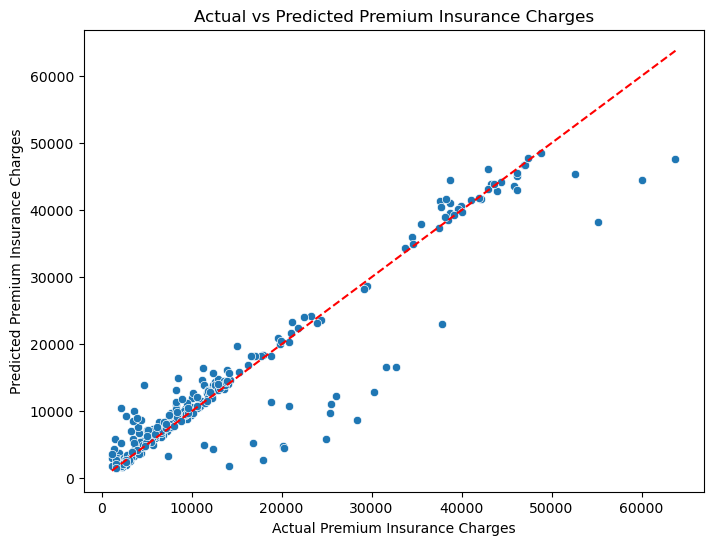

In [28]:
# Create a scatter plot for Actual vs Predicted Premium Insurance Charges
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test_original, y=rf_pred)

# Add a line for perfect predictions (y = x line)
plt.plot([y_test_original.min(), y_test_original.max()], [y_test_original.min(), y_test_original.max()], 'r--')

# Add labels and title
plt.xlabel('Actual Premium Insurance Charges')
plt.ylabel('Predicted Premium Insurance Charges')
plt.title('Actual vs Predicted Premium Insurance Charges')

# Show the plot
plt.show()

## 8 - Feature Importance Analysis 

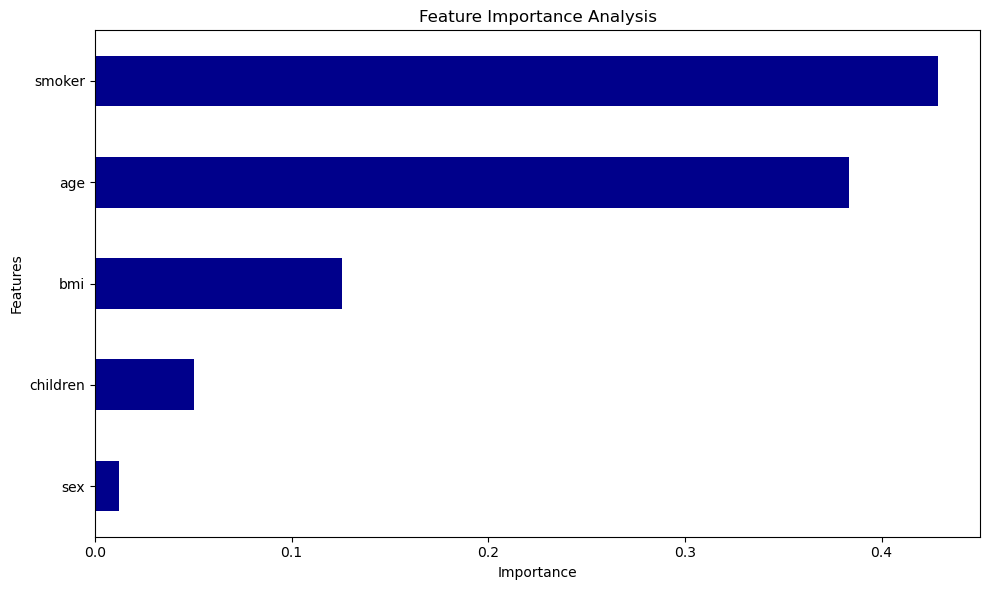

In [29]:
# Get feature importances from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort and plot feature importances in descending order
plt.figure(figsize=(10, 6))
feature_importances.sort_values(ascending=True).plot(kind='barh', color='darkblue')

# Add title and labels
plt.title('Feature Importance Analysis')
plt.xlabel('Importance')
plt.ylabel('Features')

# Show the plot
plt.tight_layout()
plt.show()


The feature importance chart shows that the 'smoker' status has the highest influence on predicting health insurance premiums, followed by 'bmi' and 'age.' Other features like 'children' and 'sex' have minimal impact on the prediction.

## 9 - Model Validation 

In [30]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 5 folds (R² as the scoring metric)
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')

# Print each fold's R² score and the mean of the cross-validated R² scores
print(f"Cross-validated R² scores for each fold: {cv_scores}")
print()
print(f"Mean Cross-validated R² score: {cv_scores.mean():.4f}")


Cross-validated R² scores for each fold: [0.73189331 0.81363694 0.75496664 0.78774525 0.76992967]

Mean Cross-validated R² score: 0.7716


The Random Forest model shows good predictive capability for the health insurance charges dataset, with strong cross-validation results indicating its robustness and reliability in making predictions.

## 10 - Project Summary: 

The objective of this project was to develop a machine learning model to predict health insurance premiums based on individual characteristics such as age, BMI, smoking status, gender, number of children, and region. After conducting exploratory data analysis (EDA) and preprocessing the dataset, we trained three machine learning models: Linear Regression, Decision Tree Regressor, and Random Forest Regressor.

Among the models, the Random Forest Regressor outperformed the others with a Mean Squared Error (MSE) of 19,916,972 and an R² score of 0.8916, meaning it explained approximately 89.16% of the variance in the target variable. 

The feature importance analysis revealed that smoking status was the most significant predictor, followed by BMI and age. The final model was validated using 5-fold cross-validation, resulting in an average R² score of 0.7716, indicating good generalization performance across different subsets of the data.

## 11 - Recommendation 

Given the strong performance of the Random Forest model, it is recommended to further improve it by performing hyperparameter tuning. 

Also, deploying this model into a production environment with a user interface could allow health insurance companies to use this model to make real-time predictions of insurance premiums for new clients based on their personal characteristics.

### By Uzoh C. Hillary 